# Importing libraries
Importing libraries is a crucial step in any data analysis project. It allows us to access pre-built functions and tools that can simplify and speed up the analysis process. 

- Numpy: Numpy is a library for numerical computing in Python. It provides tools for working with arrays and matrices, which are fundamental data structures in many scientific applications.

- Pandas: Pandas is a library for data manipulation and analysis. It provides tools for reading and writing data, as well as data cleaning and transformation functions.

- Matplotlib: Matplotlib is a library for creating static, animated, and interactive visualizations in Python. It provides a range of tools for creating line charts, scatter plots, bar charts, histograms, and more.

- OS: OS is a library for interacting with the operating system. It provides tools for working with files and directories, executing system commands, and other operating system-related tasks.

- Seaborn: Seaborn is a library for data visualization built on top of Matplotlib. It provides a higher-level interface for creating statistical graphics, such as heatmaps, pair plots, and violin plots. Seaborn also provides built-in functions for working with categorical data and for visualizing linear regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# 2. Data Preparation

- Data preparation is the process of gathering, combining, structuring and organizing data so it can be used in business intelligence (BI), analytics and data visualization applications. It is the process of cleaning, transforming and restructuring data so that users can use it for analysis, business intelligence and visualization. The focus of data preparation is mostly on the consolidation of data. Different techniques exist to help you transform one or multiple raw datasets into one usable, high-quality dataset.

# 2.1.Merging data from each month into one CSV and reading it in updated dataframe

The dataset for 2019 sales is divided into separate CSV files for each month. In order to work with the data as a whole, these CSV files need to be merged or combined into a single CSV file. Once merged, the resulting file is assigned to a variable.


In [2]:
# Setting the directory path to where the CSV files are stored

path="../CSV"
# Create an empty list to store the names of the CSV files
csv_files = []
# Looping through each file in the directory and checking if it has a .csv extension
# If it does, add the file name to the csv_files list

for name in os.listdir(path):
    if name.endswith(".csv"):
        csv_files.append(name)
# Sorting the csv_files list alphabetically by file name
csv_files.sort()
csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
# Concatenating all the CSV files into one large DataFrame called merged_dataframe
merged_dataframe=pd.concat(map(pd.read_csv,csv_files),ignore_index=True)
# Converting the merged_dataframe to a new DataFrame called updated_dataframe
updated_dataframe=pd.DataFrame(merged_dataframe)
# Creating a new DataFrame called new_dataframe that is a copy of updated_dataframe
new_dataframe=updated_dataframe
# Printing the new_dataframe to verify that the data was correctly merged and updated
new_dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


# 2.2.Removing Missing Values or Null From Dataframe

In [4]:
new_dataframe.isna().head(12)
# Checking for missing values in new_dataframe and returning a boolean dataframe where True represents a missing value

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [5]:
# checking the missing values in new_dataframe and summing all missing values in each column 
new_dataframe.isna().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

# 2.2.1 Using Heatmap for locating null values

- A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. It allows easy visualization of complex data by encoding values as colors in a two-dimensional space, making it useful for identifying patterns and relationships in large datasets. Heatmaps are commonly used in data analysis and visualization, especially in fields such as biology, economics, and social sciences. In Python, heatmaps can be created using libraries such as Seaborn or Matplotlib.

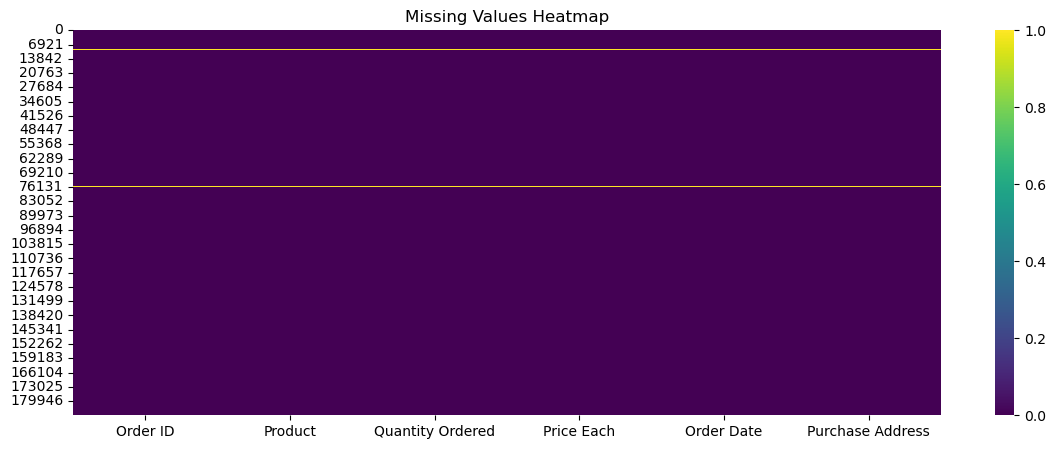

In [6]:
# Create a heatmap to visualize missing values in the updated_dataframe
plt.figure(figsize=(14,5))
sns.heatmap(new_dataframe.isna(), cmap="viridis")
plt.title("Missing Values Heatmap",)
plt.show()

In [7]:
# Removing rows containing missing values from new_dataframe
new_dataframe.dropna(inplace=True)
new_dataframe.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [8]:
new_dataframe.isna().sum()
# This code checks for null values in the new_dataframe and calculates the sum of missing values in each column.
# isna() method returns a Boolean DataFrame with True values for cells that contain null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

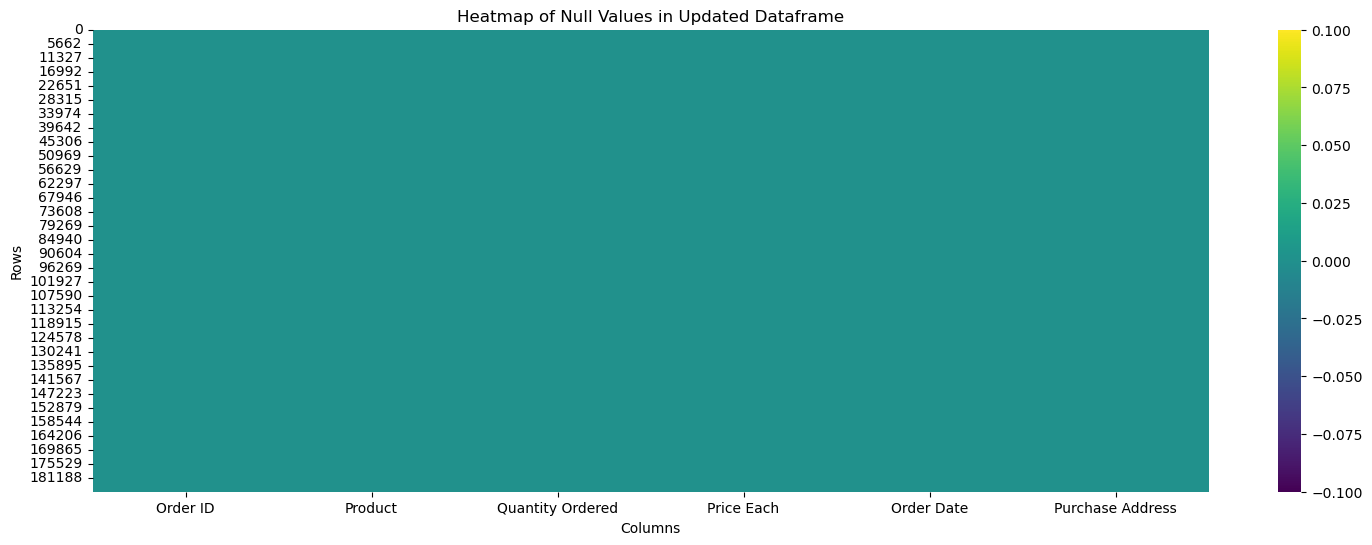

The yellow color denotes null values, while light blue denotes non-null values in the dataframe.


In [9]:
# creating heatmap of null values in updated_dataframe
plt.figure(figsize=(18,6))
sns.heatmap(new_dataframe.isna(), cmap="viridis")
plt.title("Heatmap of Null Values in Updated Dataframe")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# describing color map used in the heatmap
print("The yellow color denotes null values, while light blue denotes non-null values in the dataframe.")


In [10]:
new_dataframe
#printing new_dataframe after removing rows which contains missing values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [11]:
new_dataframe.isnull().sum()
# checking again new_dataframe after removing rows which contains missing values 

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# 2.3.Converting Datatypes of Dataframes Columns: Quantity Ordered and Price Each

In [12]:
new_dataframe.dtypes
# printing new_dataframe datatypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [13]:
#extracting the data type of quantity ordered
Qty= new_dataframe['Quantity Ordered'].dtype
Qty

dtype('float64')

In [14]:
new_dataframe['Quantity Ordered'] =pd.to_numeric(new_dataframe['Quantity Ordered'])
new_dataframe.dtypes
#converting Quantity ordered data type into numeric

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [15]:
Price=new_dataframe['Price Each'].dtype
Price
# extracting the data type of Price Each 

dtype('float64')

In [16]:
new_dataframe['Price Each']=pd.to_numeric(new_dataframe['Price Each'])
new_dataframe.dtypes
#changing Price Each data type into numeric

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# 2.4.Creating a new column named Month from Ordered Date 


In [17]:
new_dataframe['Month']=new_dataframe['Order Date']
new_dataframe.dtypes
#creates the column named Month while extracting details from ordered date and displays the data type

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [18]:
# Extract the month from the 'Month' column, remove any leading/trailing whitespace, and split by the '/' separator.
# The first item in the resulting list will be the month value. 
new_dataframe['Month'] = new_dataframe['Month'].str.strip().str.split('/').str[0]

# Convert the 'Month' column to integer datatype.
# This will enable numeric operations on the column, such as grouping or sorting by month.
new_dataframe['Month'] = new_dataframe['Month'].astype(int)


In [19]:
new_dataframe.dtypes
#printing new_dataframes data types

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [20]:
new_dataframe
# after creating new column named 'Month'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9


# 2.5 Create a new column named City from Purchase Address based on the value in update dataframe

In [21]:
new_dataframe['City']=new_dataframe['Purchase Address']
new_dataframe
# creating column named city while extracting details from Purchase Address and displays the new_dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,"511 Forest St, San Francisco, CA 94016"


# 3. Data Analysis

Data analysis is the practice of working with data to glean useful information, which can then be used to make informed decisions. It is the process of cleaning, changing, and processing raw data and extracting actionable, relevant information that helps businesses make informed decisions. Data analysis is the process of collecting, modeling, and analyzing data using various statistical and logical methods and techniques. Businesses rely on analytics processes and tools to extract insights that support strategic and operational decision-making.

# 3.1.Summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable

- Sum: It is the result of adding up all the values in a dataset. It provides a measure of the total amount or quantity of the data.
- Mean: It is the average of all the values in a dataset. It provides a measure of the central tendency of the data.
- Standard deviation: It measures how much the data deviates from the mean value. It is the square root of the variance of the dataset.
- Skewness: It measures the degree of asymmetry of the distribution of data. If the data is skewed to the left, the skewness is negative, while if it is skewed to the right, the skewness is positive.
- Kurtosis: It measures the degree of peakedness of the distribution of data. A higher value of kurtosis indicates that the distribution is more peaked and has heavier tails, while a lower value indicates that the distribution is flatter and has lighter tails.


In [22]:
new_dataframe[['Quantity Ordered','Price Each']].describe()
# calculating some descriptive statistics using describe method

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [23]:
new_dataframe[['Quantity Ordered','Price Each']].sum()
# summing total values of quantity ordered and price each

Quantity Ordered      209079.00
Price Each          34289130.68
dtype: float64

In [24]:
new_dataframe[['Quantity Ordered','Price Each']].mean()
# mean of Quantity Ordered and Price Each

Quantity Ordered      1.124383
Price Each          184.399735
dtype: float64

In [25]:
new_dataframe[['Quantity Ordered','Price Each']].std()
# standard deviation of Quantity Ordered and Price Each

Quantity Ordered      0.442793
Price Each          332.731330
dtype: float64

In [26]:
new_dataframe[['Quantity Ordered','Price Each']].skew()
# skewness of Quantity Ordered and Price Each

Quantity Ordered    4.833164
Price Each          2.872149
dtype: float64

In [27]:
new_dataframe[['Quantity Ordered','Price Each']].kurt()
# kurtosis of Quantity Ordered and Price Each

Quantity Ordered    31.820489
Price Each           9.094568
dtype: float64

# 3.2.Calculating and showing correlation of all variables

- Correlation is used to determine the strength of the relationship between two variables. It measures the extent to which changes in one variable are associated with changes in another variable. Correlation analysis is done to identify which variables are related and to what extent.

- In this step, we calculate the correlation between all the variables in the dataset. Correlation shows the relationship between two variables

In [28]:
# Calculating the correlation matrix of the new_dataframe using .corr() method.
# This method calculates pairwise correlations among all the columns in the dataframe.
# The resulting matrix will show how strongly each column is related to one another.

new_dataframe.corr()


,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


# 3.2.1. Heatmap of correlation of all variables

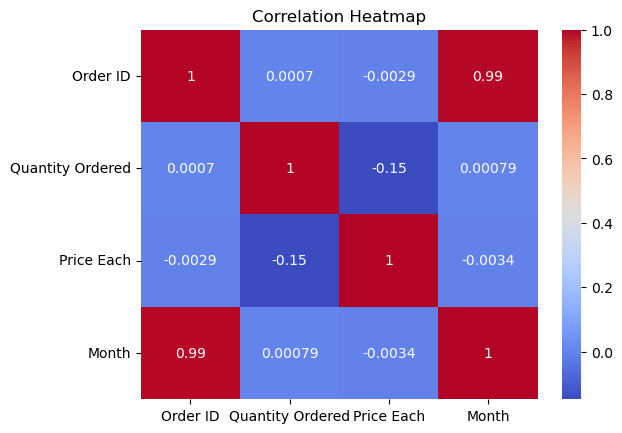

In [29]:
# plotting heatmap using Seaborn
sns.heatmap(new_dataframe.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# 4. Data Exploration

- Data exploration is the process of analyzing, summarizing, and visualizing a dataset to gain insights and understanding of the data. It involves understanding the distribution of variables, detecting patterns, identifying relationships between variables, and exploring potential outliers or anomalies. Data exploration is an important step in the data analysis process as it helps to identify trends and patterns that can guide further analysis and decision-making.


# 4.1.Bar graph of month which have best sales and earning

- A bar graph is a data visualization technique that uses rectangular bars to represent the values of variables. It is a useful tool for comparing and displaying categorical data, such as different groups or categories and their corresponding values or counts. The length or height of each bar represents the magnitude of the variable being measured. Bar graphs are commonly used in various fields, including business, finance, science, and education, to present and communicate data insights in an easy-to-understand and visually appealing way.

In [30]:
new_dataframe['Amount']=new_dataframe['Quantity Ordered']*new_dataframe['Price Each']
#creating new column called Amount in new_dataframe by multiplying Quantity ordered and Price Each

In [31]:
new_dataframe
#new_dataframe after creating Amount column and multiply Quantity Ordered and Price each

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Amount
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,"917 1st St, Dallas, TX 75001",23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,"682 Chestnut St, Boston, MA 02215",99.99
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,"220 12th St, San Francisco, CA 94016",700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,"511 Forest St, San Francisco, CA 94016",379.99


In [32]:
sales_monthly=new_dataframe['Amount'].groupby(new_dataframe['Month']).sum()
# Calculating the total sales amount per month by grouping the DataFrame by the 'Month' column and summing the 'Amount' column

In [33]:
sales_monthly
# sales_monthly after Calculating the total sales amount per month by grouping the DataFrame by the 'Month' column and 
#summing the 'Amount' column

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Amount, dtype: float64

In [34]:
print("Highest Sales Month:",sales_monthly.idxmax())
print("Sales:",sales_monthly.max())
#printing highest sales month and sales number

Highest Sales Month: 12
Sales: 4613443.34


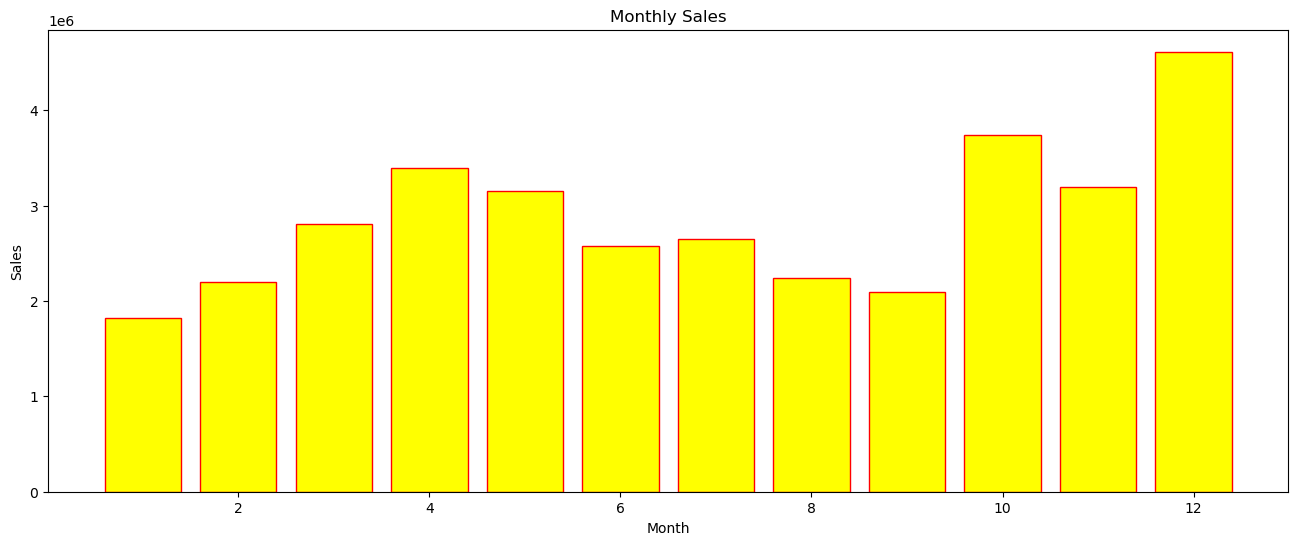

In [35]:
# Defining color for the bars
colors = ['yellow']

# Creating a figure with a size of 16 by 6 inches
plt.figure(figsize=(16, 6))

# Ploting a bar chart with x-axis as the index of sales_monthly and y-axis as the values of sales_monthly,
#with the defined color for the bars and red color for the edges
plt.bar(sales_monthly.index, sales_monthly.values, color=colors, edgecolor='red')

# Setting the title of the plot as "Monthly Sales"
plt.title('Monthly Sales')

# Setting the label for x-axis as "Month"
plt.xlabel('Month')

# Setting the label for y-axis as "Sales"
plt.ylabel('Sales')

plt.show()


# 4.2.Highest product selling city

In [36]:
new_dataframe['City']=new_dataframe['Purchase Address'].str.split(',').str.get(1).str.strip()
# Extracting the city from the Purchase Address column by splitting on commas and getting the second element

In [37]:
new_dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Amount
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99


In [38]:
high_prod_selling_city=new_dataframe['Quantity Ordered'].groupby(new_dataframe['City']).sum()
high_prod_selling_city
# Calculating the total quantity of products ordered in each city/grouping by month and summing quantity ordered in it
#And Printing after calculating

City
Atlanta          16602.0
Austin           11153.0
Boston           22528.0
Dallas           16730.0
Los Angeles      33289.0
New York City    27932.0
Portland         14053.0
San Francisco    50239.0
Seattle          16553.0
Name: Quantity Ordered, dtype: float64

In [39]:
print("Highest Product Selling City:",high_prod_selling_city.idxmax())
print("Highest Product Sales:",high_prod_selling_city.max())
#printing Highest Product Sold out Month and highest Product sales

Highest Product Selling City: San Francisco
Highest Product Sales: 50239.0


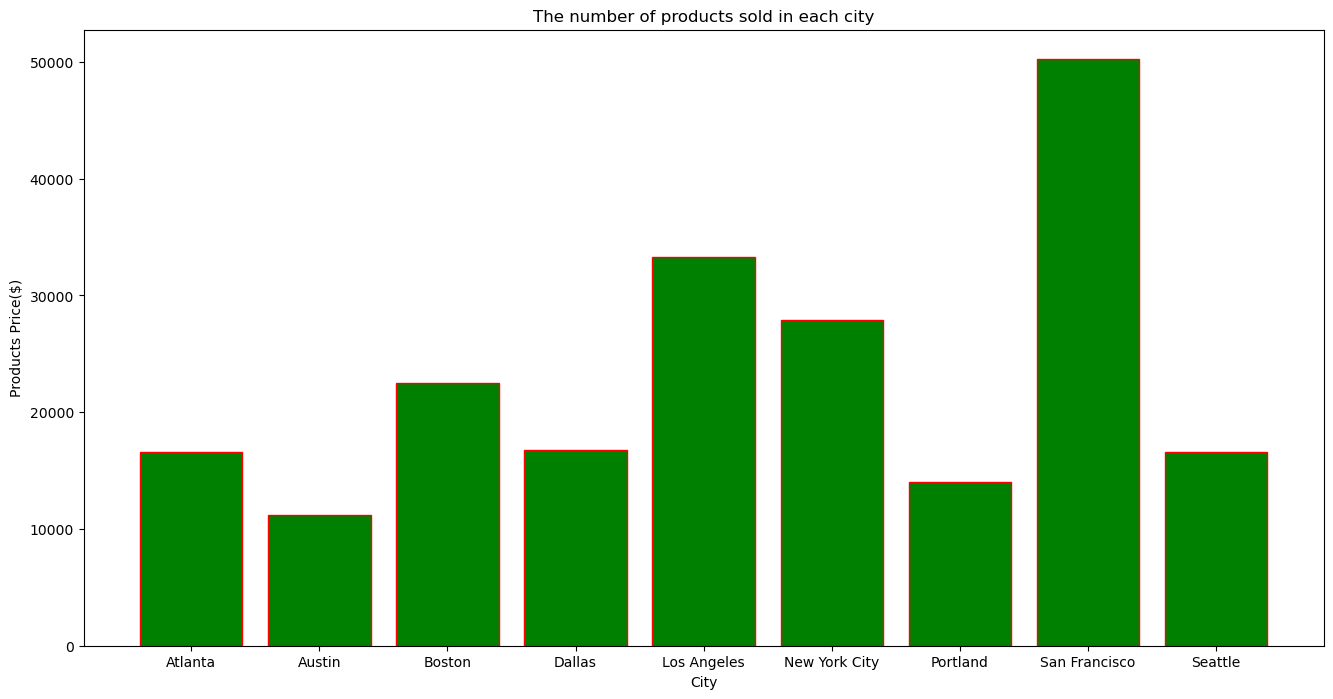

In [40]:
# Setting color, figure size, 
colr=['green']
plt.figure(figsize=(16,8))

# Creating a bar chart with the number of products sold in each city as the y-values
# and the city names as the x-values
plt.bar(high_prod_selling_city.index, high_prod_selling_city.values, color=colr, edgecolor='red')

plt.xlabel('City')

plt.ylabel('Products Price($)')

# Set the title of the bar chart
plt.title('The number of products sold in each city')

plt.show()


# 4.3.Mostly Sold Products

In [41]:
sold_products=new_dataframe['Quantity Ordered'].groupby(new_dataframe['Product']).sum()
sold_products
# Grouping the quantity ordered by the product name and calculating the sum of the values

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [42]:
print("Mostly Sold Product:",sold_products.idxmax())
print("Total Sold Quantity:",sold_products.max())
#printing Mostly sold Product and Total sold quantity

Mostly Sold Product: AAA Batteries (4-pack)
Total Sold Quantity: 31017.0


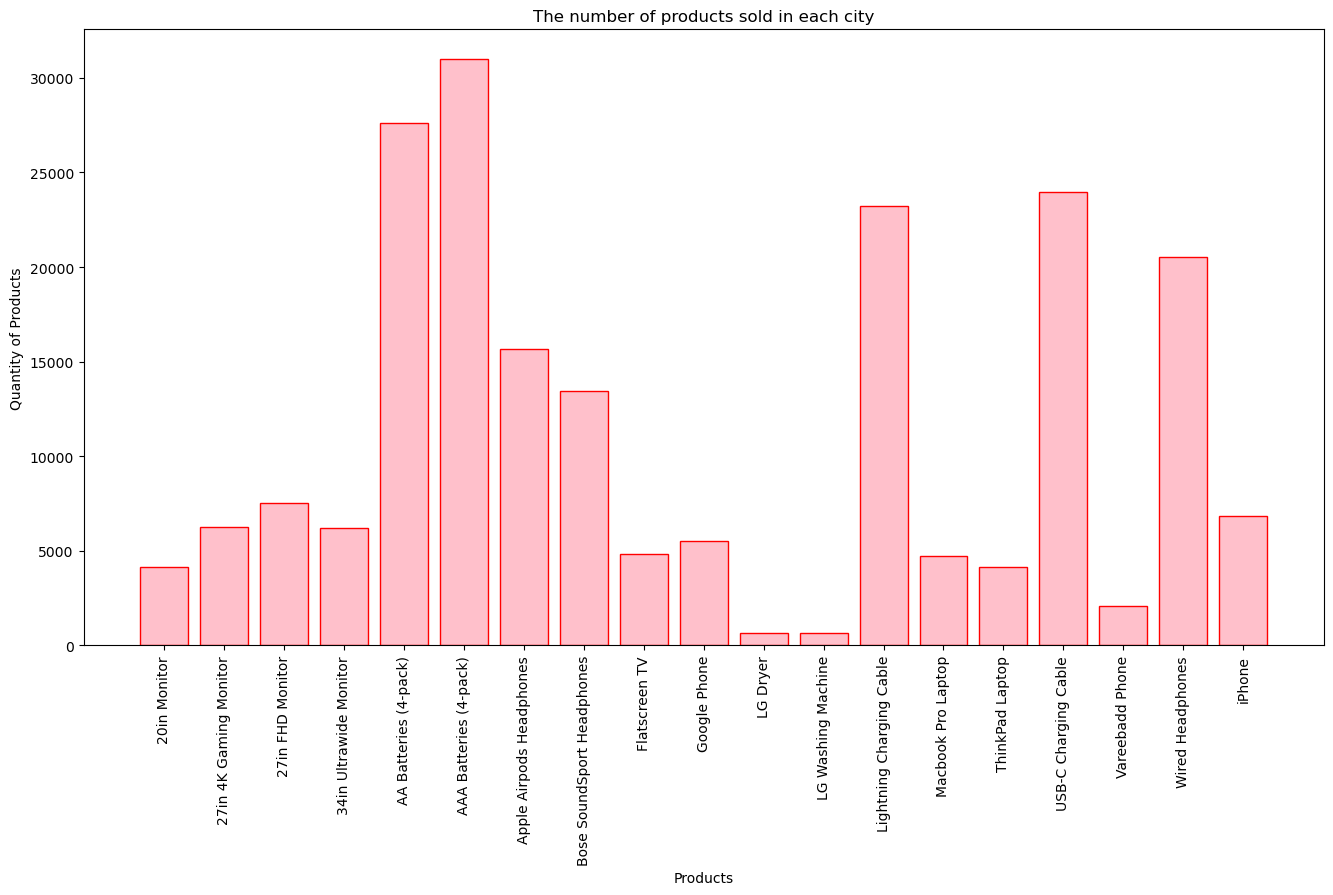

In [43]:
#defining color, figure size,
colrr=['pink']
plt.figure(figsize=(16,8))
# Creating a bar chart with the quantity of products sold in each city as the y-values
# and the products names as the x-values
plt.bar(sold_products.index, sold_products.values, color=colrr, edgecolor='red')
plt.xlabel('Products')
plt.xticks(rotation=90)
plt.ylabel('Quantity of Products')
plt.title('The number of products sold in each city')
plt.show()

#  4.4.Showing histogram plot of chosen variables

- A histogram is a graphical representation of a distribution of continuous data. It is used to visualize the underlying frequency distribution of a set of continuous data by dividing the range of values into intervals called bins, and counting the number of observations that fall into each bin. The resulting plot gives a rough idea of the shape of the distribution, as well as the central tendency, variability, and skewness of the data. Histograms are commonly used in statistical analysis, quality control, and scientific research to explore, summarize, and compare datasets.

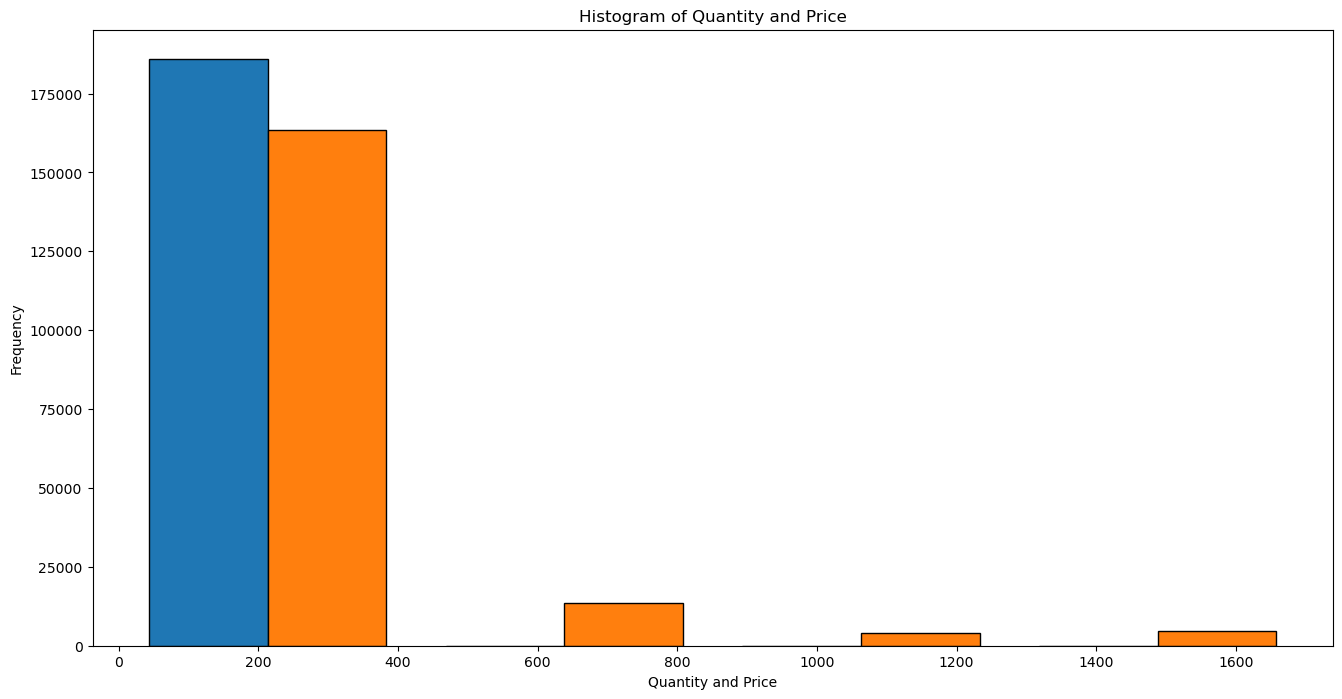

In [44]:
plt.figure(figsize=(16, 8))

# extract the data to plot from the new_dataframe
data_to_plot = new_dataframe[['Quantity Ordered','Price Each']]

# plot the histogram with 4 bins and a black edgecolor
plt.hist(data_to_plot, bins=4, edgecolor='black')

# add axis labels and a title
plt.xlabel('Quantity and Price')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity and Price')

plt.show()
